# Linear Regression: Auto MPG Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reference: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

df = pd.read_csv("auto_mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
df.drop(df.columns[8], axis=1, inplace=True)    # Discard the discrete-valued features
df.dropna(axis=0, inplace=True)                 # Discard rows with missing values
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Explore the data set

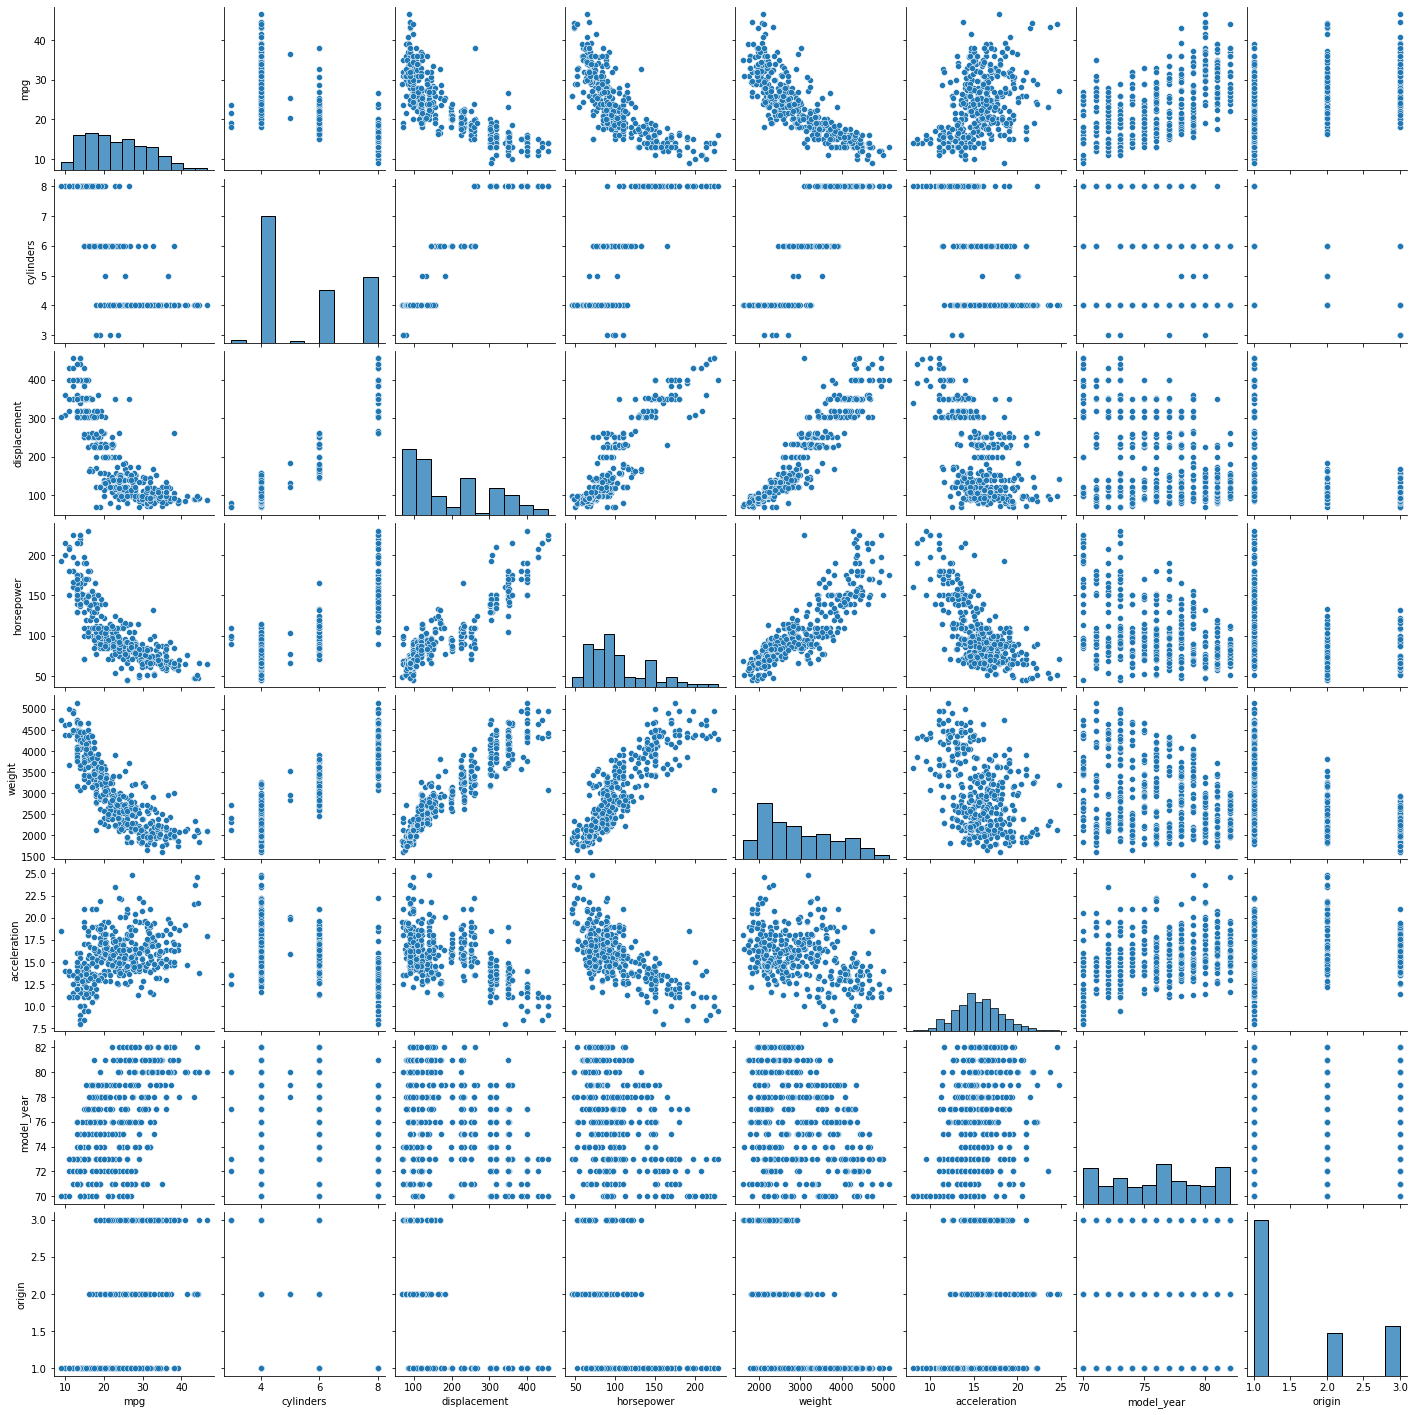

In [6]:
sns.pairplot(df)
plt.show()

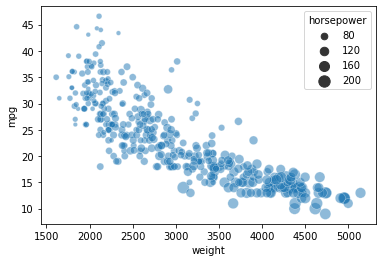

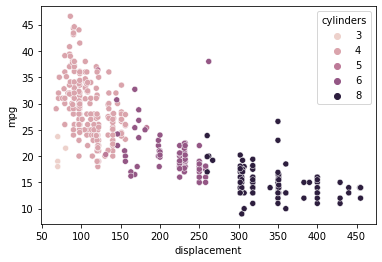

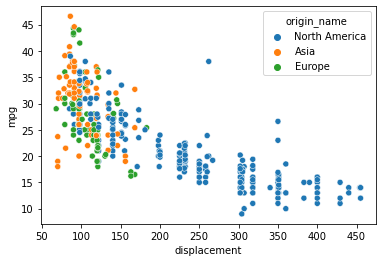

In [7]:
# Scatter plots and Bubble plots
sns.scatterplot(data=df, x="weight", y="mpg", 
                size="horsepower", sizes=(20, 150), alpha=0.5)
plt.show()
sns.scatterplot(data=df, x="displacement", y="mpg", hue="cylinders")
plt.show()

origins = {1:"North America", 2:"Europe", 3:"Asia"}
df["origin_name"] = df["origin"].map(origins)

sns.scatterplot(data=df, x="displacement", y="mpg", hue="origin_name")
plt.show()

Separate the regressors (X) from the targets (y).

In [8]:
# For X, take 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'
# For y, take 'mpg'

X = df.iloc[:,1:-2].to_numpy()
y = df.iloc[:,0].to_numpy().reshape(-1,1)
print(X.shape)
print(y.shape)

(392, 6)
(392, 1)


## Split the data into training and testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

N_train, N_test = len(y_train), len(y_test)
print(N_train)
print(N_test)

(274, 6)
(274, 1)
(118, 6)
(118, 1)
274
118


Normalize all data. (Note: The Standard Scaler uses the Population Standard Deviation formula)

In [10]:
scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

scalerY = StandardScaler()
y_train_scaled = scalerY.fit_transform(y_train)
y_test_scaled = scalerY.transform(y_test)

Verify how Standard Scaler works. 

In [11]:
print("X_train_scaled using code:")
print((X_train - np.mean(X_train, axis=0))/np.std(X_train, axis=0))
print("X_train_scaled using Standard Scaler:")
print(X_train_scaled)

X_train_scaled using code:
[[-0.88659063 -0.74193869 -0.59996499 -0.32608987  1.38921663  1.63465433]
 [ 0.29841343  0.34422062  0.13874973  1.08018215  1.96475298 -0.27360313]
 [-0.88659063 -0.95529141 -0.70549566 -0.82367558 -0.37336346 -0.54621134]
 ...
 [-0.88659063 -0.77103224 -0.78464367 -0.99190695 -0.01365323 -0.81881954]
 [ 0.29841343  0.52847978 -0.44166898  0.17031112 -0.37336346 -1.36403596]
 [ 0.29841343 -0.23765044 -0.20422496 -0.0133217  -0.37336346 -0.27360313]]
X_train_scaled using Standard Scaler:
[[-0.88659063 -0.74193869 -0.59996499 -0.32608987  1.38921663  1.63465433]
 [ 0.29841343  0.34422062  0.13874973  1.08018215  1.96475298 -0.27360313]
 [-0.88659063 -0.95529141 -0.70549566 -0.82367558 -0.37336346 -0.54621134]
 ...
 [-0.88659063 -0.77103224 -0.78464367 -0.99190695 -0.01365323 -0.81881954]
 [ 0.29841343  0.52847978 -0.44166898  0.17031112 -0.37336346 -1.36403596]
 [ 0.29841343 -0.23765044 -0.20422496 -0.0133217  -0.37336346 -0.27360313]]


Plot the data to see the normalized data versus the original data.

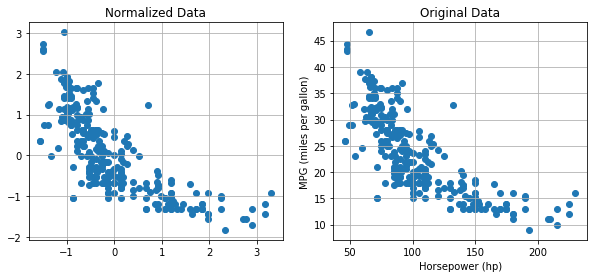

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Normalized Data')
plt.scatter(X_train_scaled[:,2],y_train_scaled)
plt.grid()
plt.subplot(122)
plt.title('Original Data')
plt.scatter(X_train[:,2],y_train)
plt.xlabel('Horsepower (hp)')
plt.ylabel('MPG (miles per gallon)')
plt.grid()
plt.show()

## Perform linear regression

In [13]:
X_train_design = np.hstack((np.ones((N_train,1)),X_train_scaled))
X_test_design = np.hstack((np.ones((N_test,1)),X_test_scaled))
print(X_train_design)

W_int = np.linalg.inv(X_train_design.T @ X_train_design) @ X_train_design.T @ y_train_scaled
print('Weights with intercept:')
print(W_int)

W = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
print('Weights without intercept:')
for i in range(len(W)):
    print(f"{W[i]}\t-> {df.columns.values[i+1]}")

[[ 1.         -0.88659063 -0.74193869 ... -0.32608987  1.38921663
   1.63465433]
 [ 1.          0.29841343  0.34422062 ...  1.08018215  1.96475298
  -0.27360313]
 [ 1.         -0.88659063 -0.95529141 ... -0.82367558 -0.37336346
  -0.54621134]
 ...
 [ 1.         -0.88659063 -0.77103224 ... -0.99190695 -0.01365323
  -0.81881954]
 [ 1.          0.29841343  0.52847978 ...  0.17031112 -0.37336346
  -1.36403596]
 [ 1.          0.29841343 -0.23765044 ... -0.0133217  -0.37336346
  -0.27360313]]
Weights with intercept:
[[ 1.04083409e-17]
 [-6.15747088e-02]
 [ 2.73589667e-02]
 [-2.82667400e-03]
 [-6.89226788e-01]
 [ 1.72457120e-02]
 [ 3.40620125e-01]]
Weights without intercept:
[-0.06157471]	-> cylinders
[0.02735897]	-> displacement
[-0.00282667]	-> horsepower
[-0.68922679]	-> weight
[0.01724571]	-> acceleration
[0.34062012]	-> model_year


## Evaluate the model for training and test data

  Training MSE:	0.18831618740661105
  Test MSE:	0.206128158811164
  Training R2:	0.811683812593389
  Test R2:	0.798334512883872


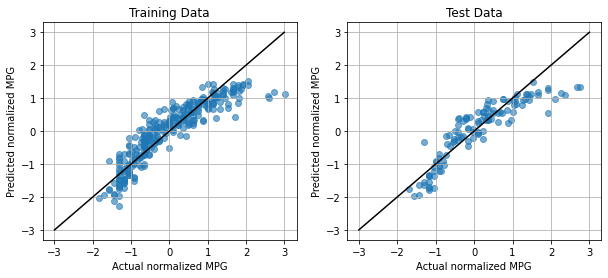

In [14]:
y_train_pred = X_train_design @ W_int
y_test_pred = X_test_design @ W_int

y_train_MSE = np.sum((y_train_pred - y_train_scaled) ** 2)
y_train_R2 = 1 - y_train_MSE/np.sum((y_train_scaled - np.mean(y_train_scaled)) ** 2)
y_train_MSE /= len(y_train_pred)

y_test_MSE = np.sum((y_test_pred - y_test_scaled) ** 2)
y_test_R2 = 1 - y_test_MSE/np.sum((y_test_scaled - np.mean(y_test_scaled)) ** 2)
y_test_MSE /= len(y_test_pred)

print(f"  Training MSE:\t{y_train_MSE}")
print(f"  Test MSE:\t{y_test_MSE}")
print(f"  Training R2:\t{y_train_R2}")
print(f"  Test R2:\t{y_test_R2}")

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Training Data')
plt.scatter(y_train_scaled,y_train_pred,alpha=0.6)
plt.xlabel('Actual normalized MPG')
plt.ylabel('Predicted normalized MPG')
plt.plot([-3,3],[-3,3],'k')
plt.grid()
plt.subplot(122)
plt.title('Test Data')
plt.scatter(y_test_scaled,y_test_pred,alpha=0.6)
plt.xlabel('Actual normalized MPG')
plt.ylabel('Predicted normalized MPG')
plt.plot([-3,3],[-3,3],'k')
plt.grid()
plt.show()

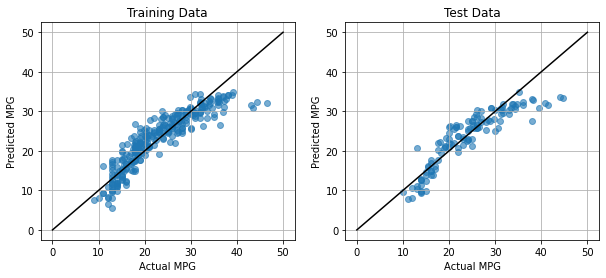

In [15]:
y_train_pred_ = scalerY.inverse_transform(y_train_pred)
y_test_pred_ = scalerY.inverse_transform(y_test_pred)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Training Data')
plt.scatter(y_train,y_train_pred_,alpha=0.6)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.plot([0,50],[0,50],'k')
plt.grid()
plt.subplot(122)
plt.title('Test Data')
plt.scatter(y_test,y_test_pred_,alpha=0.6)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.plot([0,50],[0,50],'k')
plt.grid()
plt.show()